<a href="https://colab.research.google.com/github/ajaythakur3369/Digital-Bhem-Internship/blob/main/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Movie Recommendation**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - Digital Bhem**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/Digital-Bhem-Internship)**

# **Problem Statement -**

**To build a system that recommends movies to users based on their past viewing history and ratings, using a variety of algorithms such as collaborative filtering or content-based filtering.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Load Data**

In [ ]:
# Access the Drive from Colab to access the file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df_links = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/Digital_Bhem/File_Name/Movie_links_dataset.csv')
df_movies = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/Digital_Bhem/File_Name/Movies_dataset.csv')
df_ratings = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/Digital_Bhem/File_Name/Movie_ratings_dataset.csv')

In [ ]:
# This dataset contains the IDs of the movies
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
df_links.shape

(45843, 3)

**Observation of the df_links dataset:- It contains the IDs of more than 60,000 movies**

In [ ]:
# This dataset contains the titles and genres of the movies
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Importing regular expression
import re

# Cleaning the titles from the datasets
def clean_title(title):
    title = re.sub("[^a-zA-Z0-9 ]", "", title)
    return title

In [ ]:
df_movies["clean_title"] = df_movies["title"].apply(clean_title)

In [ ]:
df_movies

,movieId,title,genres,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995
...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,Kein Bund frs Leben 2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,Feuer Eis Dosenbier 2002
27275,131258,The Pirates (2014),Adventure,The Pirates 2014
27276,131260,Rentun Ruusu (2001),(no genres listed),Rentun Ruusu 2001


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1, 2))

# Use the fit_transform() method of the vectorizer object to transform the "clean_title" column of the "movies" DataFrame, into a sparse matrix
tfidf = vectorizer.fit_transform(df_movies["clean_title"])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define a function called "search" that takes a "title" argument
def search(title):

    # Clean the input "title" using the "clean_title" function
    title = clean_title(title)
    query_vec = vectorizer.transform([title])
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = df_movies.iloc[indices].iloc[::-1]

    # Return the top 5 results
    return results

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create a widget for the movie title input, with a default value of "Toy Story"
movie_input = widgets.Text(
    value='Toy Story',
    description='Movie Title:',
    disabled=False
)
movie_list = widgets.Output()

# Define a function called "on_type" that is called when the movie title input is changed
def on_type(data):
    with movie_list:
        movie_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            display(search(title))

movie_input.observe(on_type, names='value')
display(movie_input, movie_list)

Text(value='Toy Story', description='Movie Title:')

Output()

In [ ]:
movie_id = 89745

# def find_similar_movies(movie_id):
movie = df_movies[df_movies["movieId"] == movie_id]

In [ ]:
df_ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp     object
dtype: object

In [ ]:
df_ratings.isnull()

,userId,movieId,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
20000258,False,False,False,False
20000259,False,False,False,False
20000260,False,False,False,False
20000261,False,False,False,False


In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [ ]:
df_ratings.drop_duplicates()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [ ]:
print(df_ratings.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [ ]:
min(df_ratings['rating'].values)

0.5

In [ ]:
# Perform analysis to identify the highest-rated movies
highest_rated_movies = df_ratings.groupby('movieId')['rating'].mean().sort_values(ascending = False).head(5)

In [ ]:
print("highest-rated movies:")
print(highest_rated_movies)

highest-rated movies:
movieId
95517     5.0
105846    5.0
89133     5.0
105187    5.0
105191    5.0
Name: rating, dtype: float64


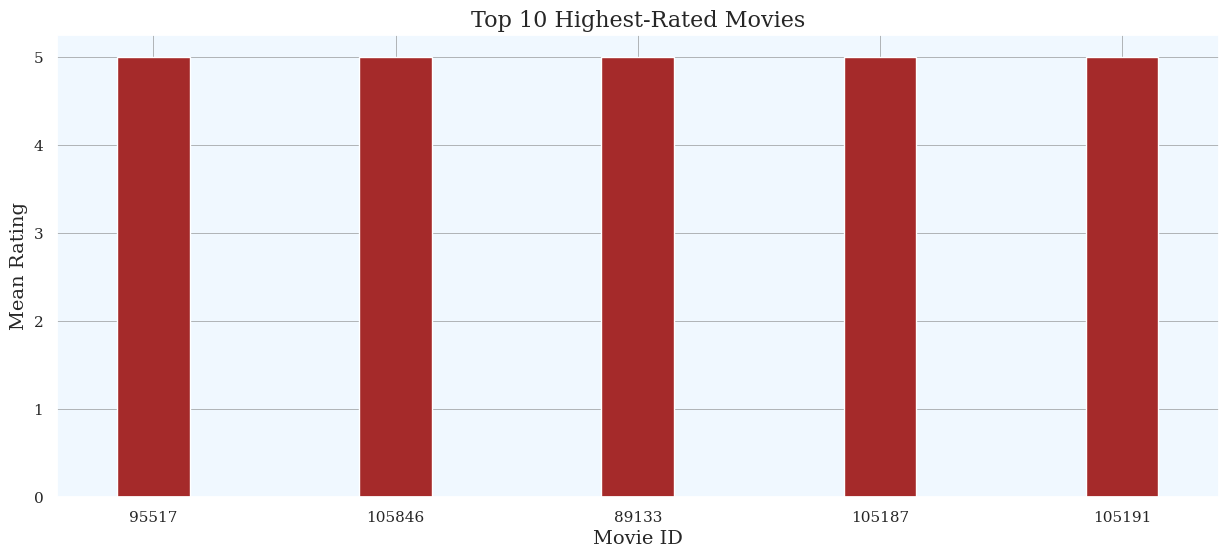

In [ ]:
# Graphical representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
ax = highest_rated_movies.plot(kind = 'bar', color = 'brown', width = 0.3)

ax.patch.set_facecolor('aliceblue')
plt.grid(True, color="grey", linewidth="0.4")
plt.xlabel("Movie ID", fontname='serif', fontsize=14)
plt.xticks(rotation=0, fontname='serif')
plt.yticks(fontname='serif')
plt.ylabel("Mean Rating", fontname='serif', fontsize=14)
plt.yticks(fontname='serif')
plt.title("Top 10 Highest-Rated Movies", fontname='serif', fontsize=16)
plt.show()

In [ ]:
# Perform analysis to identify the Lowest-rated movies
Lowest_rated_movies = df_ratings.groupby('movieId')['rating'].mean().sort_values(ascending = False).tail(5)

In [ ]:
print("5 lowest-rated movies:")
print(Lowest_rated_movies)

5 lowest-rated movies:
movieId
129784    0.5
92479     0.5
129834    0.5
115631    0.5
119909    0.5
Name: rating, dtype: float64


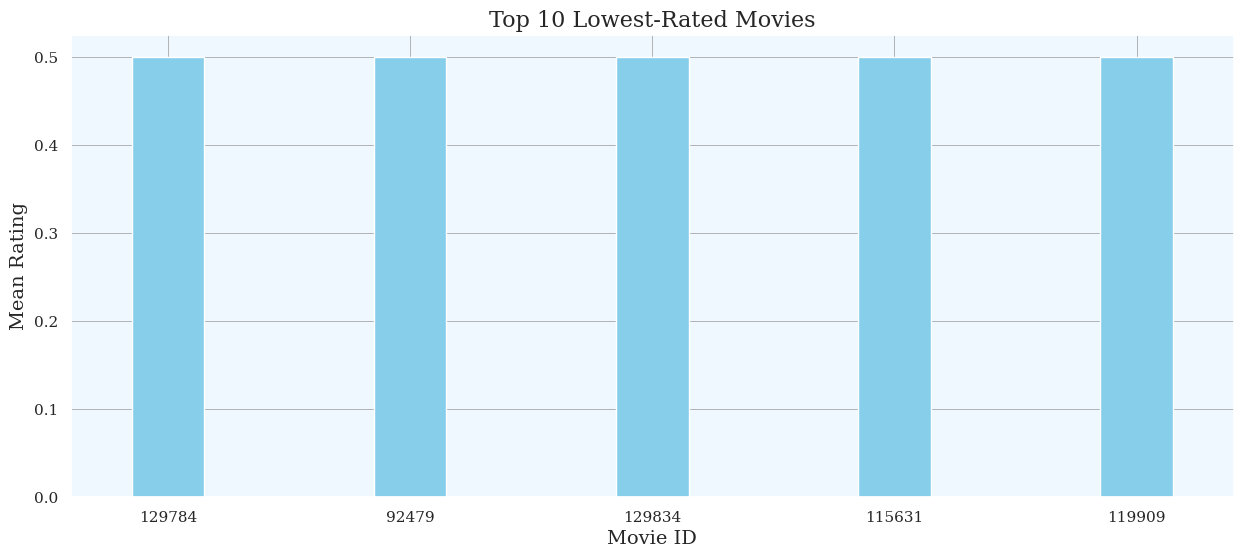

In [ ]:
# Graphical representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
ax = Lowest_rated_movies.plot(kind = 'bar', color = 'skyblue', width = 0.3)

ax.patch.set_facecolor('aliceblue')
plt.grid(True, color="grey", linewidth="0.4")
plt.xlabel("Movie ID", fontname='serif', fontsize=14)
plt.xticks(rotation=0, fontname='serif')
plt.yticks(fontname='serif')
plt.ylabel("Mean Rating", fontname='serif', fontsize=14)
plt.yticks(fontname='serif')
plt.title("Top 10 Lowest-Rated Movies", fontname='serif', fontsize=16)
plt.show()

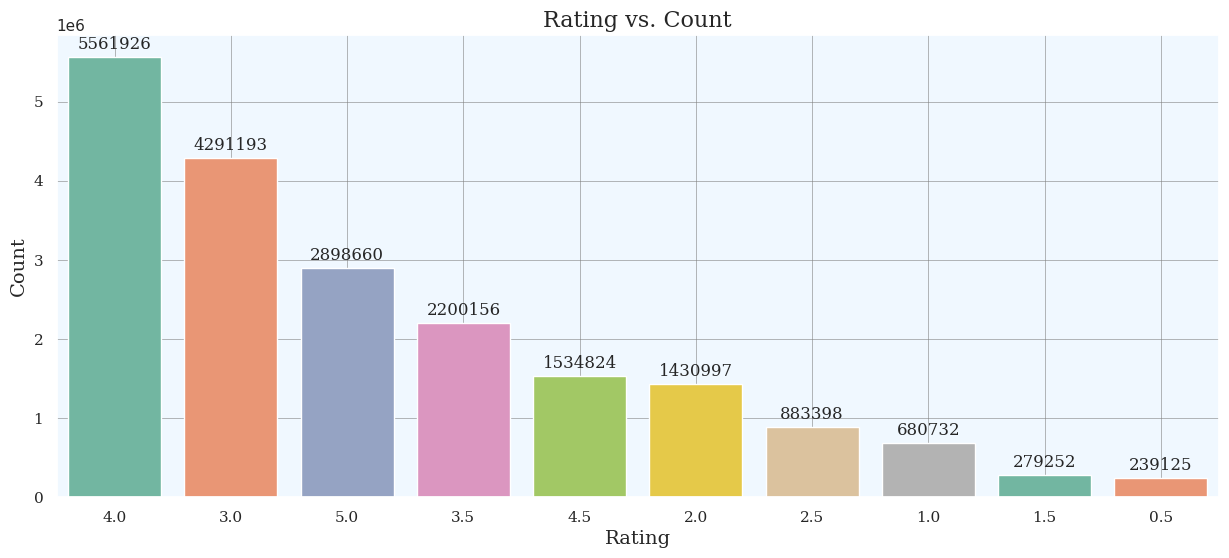

In [ ]:
# Graphical representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)

ax = sns.countplot(x = "rating", data = df_ratings, palette = "Set2", order = df_ratings['rating'].value_counts().index[0:15])
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width() / 2, g.get_height()), ha='center', va='center',
                xytext=(0, 9), textcoords='offset points', fontname='serif')

ax.patch.set_facecolor('aliceblue')
plt.grid(True, color="grey", linewidth="0.4")
plt.xlabel("Rating", fontname='serif', fontsize=14)
plt.xticks(fontname='serif')
plt.ylabel("Count", fontname='serif', fontsize=14)
plt.yticks(fontname='serif')
plt.title("Rating vs. Count", fontname='serif', fontsize=16)
plt.show()

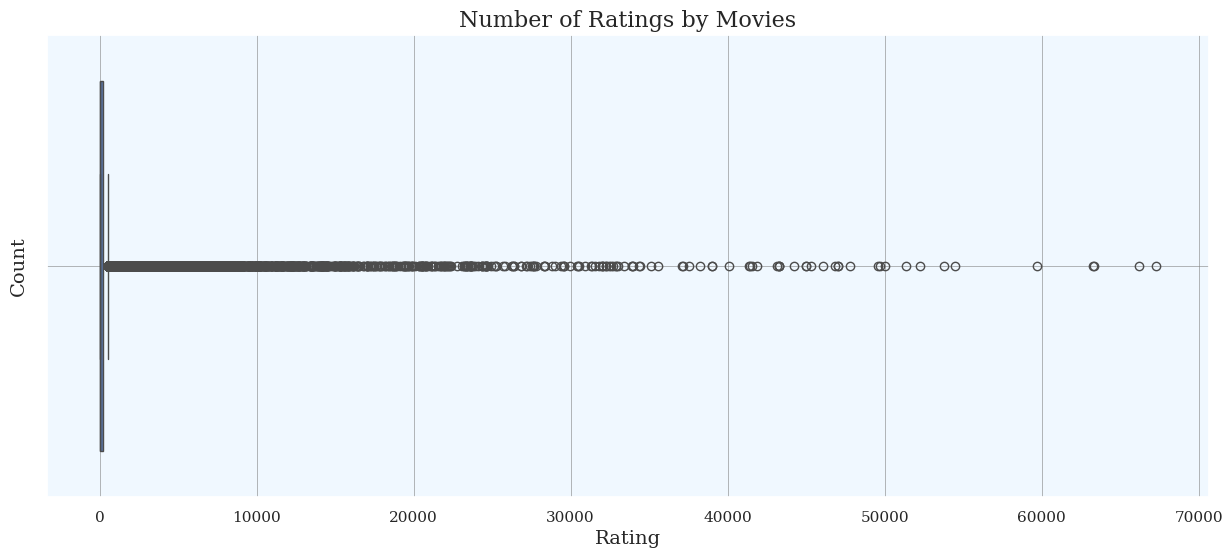

In [ ]:
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
df_movie_rating_count = df_ratings.groupby('movieId').count()
ax = sns.boxplot(x = 'rating', data = df_movie_rating_count)
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color="grey", linewidth="0.4")
plt.xlabel("Rating", fontname='serif', fontsize=14)
plt.xticks(fontname='serif')
plt.ylabel("Count", fontname='serif', fontsize=14)
plt.yticks(fontname='serif')
plt.title("Number of Ratings by Movies", fontname='serif', fontsize=16)
plt.show()

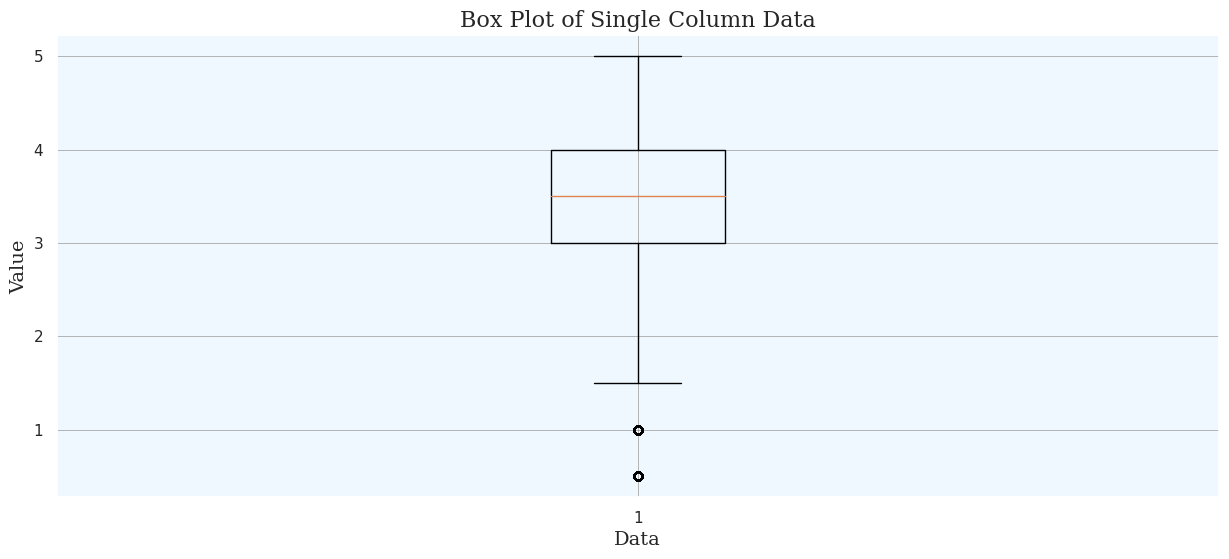

In [ ]:
# Generate some sample data
# Box plot representation

fig, ax = plt.subplots()
ax.boxplot(df_ratings['rating'])
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")

# Add labels and title
ax.set_xlabel('Data', fontname = 'serif', fontsize = 14)
ax.set_ylabel('Value', fontname = 'serif', fontsize = 14)
ax.set_title('Box Plot of Single Column Data', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
from scipy import stats
# Calculate the z-score of each value in the numerical columns and check whether the absolute value is less than 1
num_cols = df_ratings.select_dtypes('number')
ratings = df_ratings[(np.abs(stats.zscore(num_cols)) < 1).all(axis = 1)]

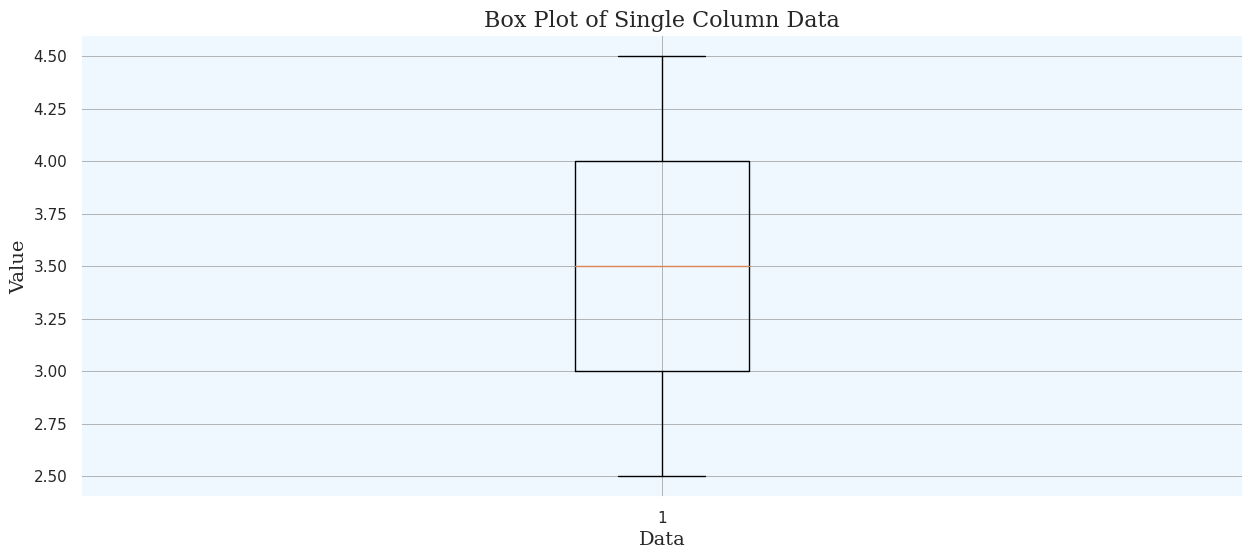

In [ ]:
# Generate some sample data
# Box plot representation
fig, ax = plt.subplots()
ax.boxplot(ratings['rating'])
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")

# Add labels and title
ax.set_xlabel('Data', fontname = 'serif', fontsize = 14)
ax.set_ylabel('Value', fontname = 'serif', fontsize = 14)
ax.set_title('Box Plot of Single Column Data', fontname = 'serif', fontsize = 16)
plt.show()



In [ ]:
# Get the unique user IDs of users who have rated a particular movie highly
# (i.e., have given it a rating greater than 4)
similar_users = df_ratings[(df_ratings["movieId"] == movie_id) & (df_ratings["rating"] > 4)]["userId"].unique()

In [ ]:
# Get the IDs of the movies that have been highly rated by the users who have rated a particular movie highly
similar_user_recs = df_ratings[(df_ratings["userId"].isin(similar_users)) & (df_ratings["rating"] > 4)]["movieId"]

In [ ]:
# Calculate the relative frequency of each movie ID in the list of recommended movies from similar users
similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

# Filter the list of recommended movies to keep only those that are recommended by at least 10% of similar users
similar_user_recs = similar_user_recs[similar_user_recs > .10]

In [ ]:
# Get all the rows from the "ratings" DataFrame that have a movie ID that is in the list of recommended movies from similar users and a rating greater than 4
all_users = df_ratings[(df_ratings["movieId"].isin(similar_user_recs.index)) & (df_ratings["rating"] > 4)]

In [ ]:
# Calculate the relative frequency of each movie ID in the list of all recommended movies from similar users
all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())

In [ ]:
# Combine the Series of relative frequencies of recommended movies from similar users and all users into a DataFrame
rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis = 1)
rec_percentages.columns = ["similar", "all"]

In [ ]:
rec_percentages

,similar,all
movieId,,
89745,1.000000,0.015900
58559,0.594554,0.088518
79132,0.534653,0.056884
7153,0.493564,0.132942
2571,0.493069,0.210196
...,...,...
924,0.103960,0.083834
1617,0.102970,0.083583
88744,0.102970,0.003526


In [ ]:
# Calculate the score for each recommended movie by dividing the relative
# Frequency of recommended movies from similar users by the relative frequency of recommended movies from all users
rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]

In [ ]:
rec_percentages = rec_percentages.sort_values("score", ascending = False)

In [ ]:
rec_percentages.head(10).merge(df_movies, left_index = True, right_on = "movieId")

,similar,all,score,movieId,title,genres,clean_title
17874,1.000000,0.015900,62.895050,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,Avengers The 2012
20906,0.162871,0.003432,47.459797,102125,Iron Man 3 (2013),Action|Sci-Fi|Thriller|IMAX,Iron Man 3 2013
23085,0.107426,0.002393,44.895479,110102,Captain America: The Winter Soldier (2014),Action|Adventure|Sci-Fi|IMAX,Captain America The Winter Soldier 2014
17506,0.145050,0.003392,42.756959,88140,Captain America: The First Avenger (2011),Action|Adventure|Sci-Fi|Thriller|War,Captain America The First Avenger 2011
17040,0.146040,0.003471,42.072652,86332,Thor (2011),Action|Adventure|Drama|Fantasy|IMAX,Thor 2011
19204,0.111386,0.002897,38.454854,95510,"Amazing Spider-Man, The (2012)",Action|Adventure|Sci-Fi|IMAX,Amazing SpiderMan The 2012
18349,0.107426,0.002904,36.987062,91630,Mission: Impossible - Ghost Protocol (2011),Action|Adventure|Thriller|IMAX,Mission Impossible Ghost Protocol 2011
23381,0.121287,0.003400,35.669646,111362,X-Men: Days of Future Past (2014),Action|Adventure|Sci-Fi,XMen Days of Future Past 2014
20994,0.158416,0.004762,33.266803,102445,Star Trek Into Darkness (2013),Action|Adventure|Sci-Fi|IMAX,Star Trek Into Darkness 2013
19813,0.110891,0.003416,32.461961,97913,Wreck-It Ralph (2012),Animation|Comedy,WreckIt Ralph 2012


In [ ]:
# Function that takes a movie ID and returns a list of 10 recommended movies based on the ratings of users who gave the input movie a rating of 4 or higher.
def find_similar_movies(movie_id):
    similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] > 4)]["userId"].unique()
    similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] > 4)]["movieId"]
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

    similar_user_recs = similar_user_recs[similar_user_recs > .10]
    all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]
    all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())
    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis = 1)
    rec_percentages.columns = ["similar", "all"]

    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    rec_percentages = rec_percentages.sort_values("score", ascending = False)
    return rec_percentages.head(10).merge(df_movies, left_index = True, right_on = "movieId")[["score", "title", "genres"]]

In [ ]:
# This code creates an interactive widget using ipywidgets to take input
# For a movie title and display a list of recommended movies based on user
# Ratings data. The widget uses the "find_similar_movies" function to generate
# The recommended movies based on the input movie title.
import ipywidgets as widgets
from IPython.display import display

movie_name_input = widgets.Text(
    value = 'Toy Story',
    description = 'Movie Title:',
    disabled = False
)
recommendation_list = widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            results = search(title)
            movie_id = results.iloc[0]["movieId"]
            display(find_similar_movies(movie_id))

movie_name_input.observe(on_type, names = 'value')
display(movie_name_input, recommendation_list)

Text(value='Toy Story', description='Movie Title:')

Output()

In [ ]:
from sklearn.model_selection import train_test_split

**Machine Learning Models**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

**Linear Regression**

In [ ]:
x = ratings.drop(["timestamp"], axis = 1)
y = ratings["movieId"]
x = x.values
y = y.values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

100.0 %


**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=1)

# Fitting the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#Calculating the accuracy
dt_score = model.score(x_test, y_test)
print(dt_score*100, '%')

99.99999999935 %


**KNN Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 10)
model.fit(x_train, y_train)
KNeighborsRegressor(n_neighbors = 10)
y_pred = model.predict(x_test)
r2_score = model.score(x_test, y_test)
print(r2_score*100, '%')